In [48]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
from IPython.display import display
resource_path = "../../data/Lab_Assignment1"

## Image Negative of a Image

In [27]:
def negative_pixel_callback(pixel):
    return 255 - pixel

def image_negative(image):
    return Image.eval(image, negative_pixel_callback)

## Log Transformation of an Image

In [28]:
def log_transformationl_callback(pixel):
    return (np.log1p(pixel) / np.log1p(255)) * 255

def log_transformation(image):
    log_image = Image.eval(image,log_transformationl_callback)
    return log_image

## Inverse Log Transformations

In [29]:
def inverse_log_transformation_callback(pixel):
    return (np.expm1(pixel / 255) * 255)


def inverse_log_transformation(image):
    inverse_log_image = Image.eval(image,inverse_log_transformation_callback)
    return inverse_log_image

## Gamma Correction (power law) 
- with different +ve and –ve values of gamma
- gamma greater than 1 and less than 1.

In [30]:
def gamma_correction_callback(pixel, gamma):
    return (pixel / 255) ** (1 / gamma) * 255

def gamma_correction(image, gamma):
    gamma_image = Image.eval(image, lambda pixel: gamma_correction_callback(pixel, gamma))
    return gamma_image


## Driver Code

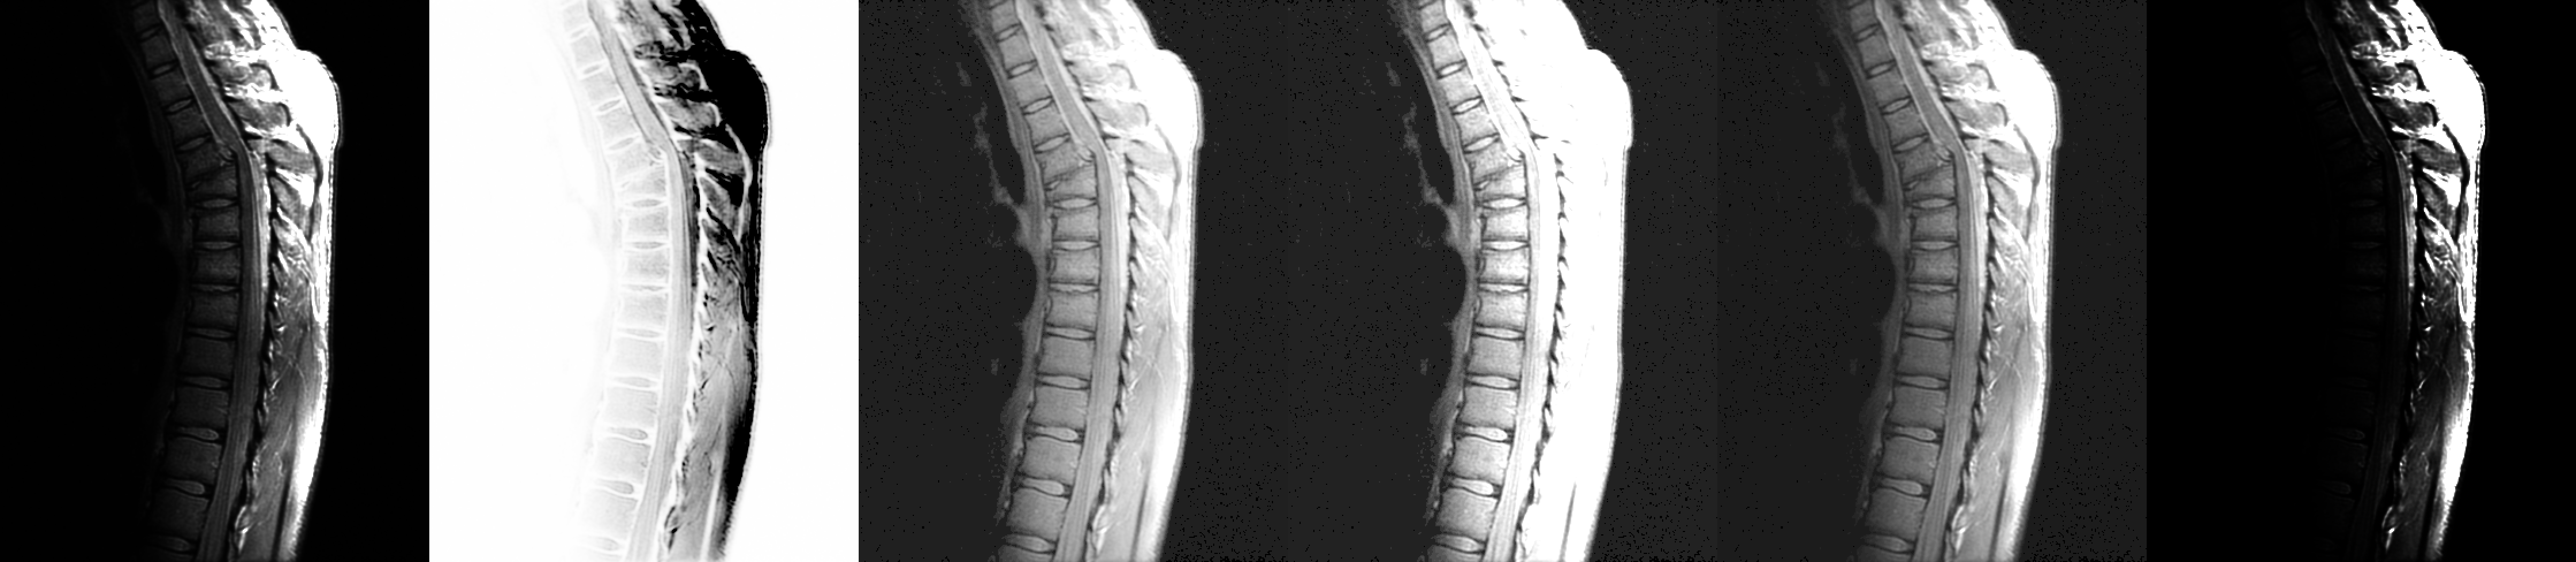

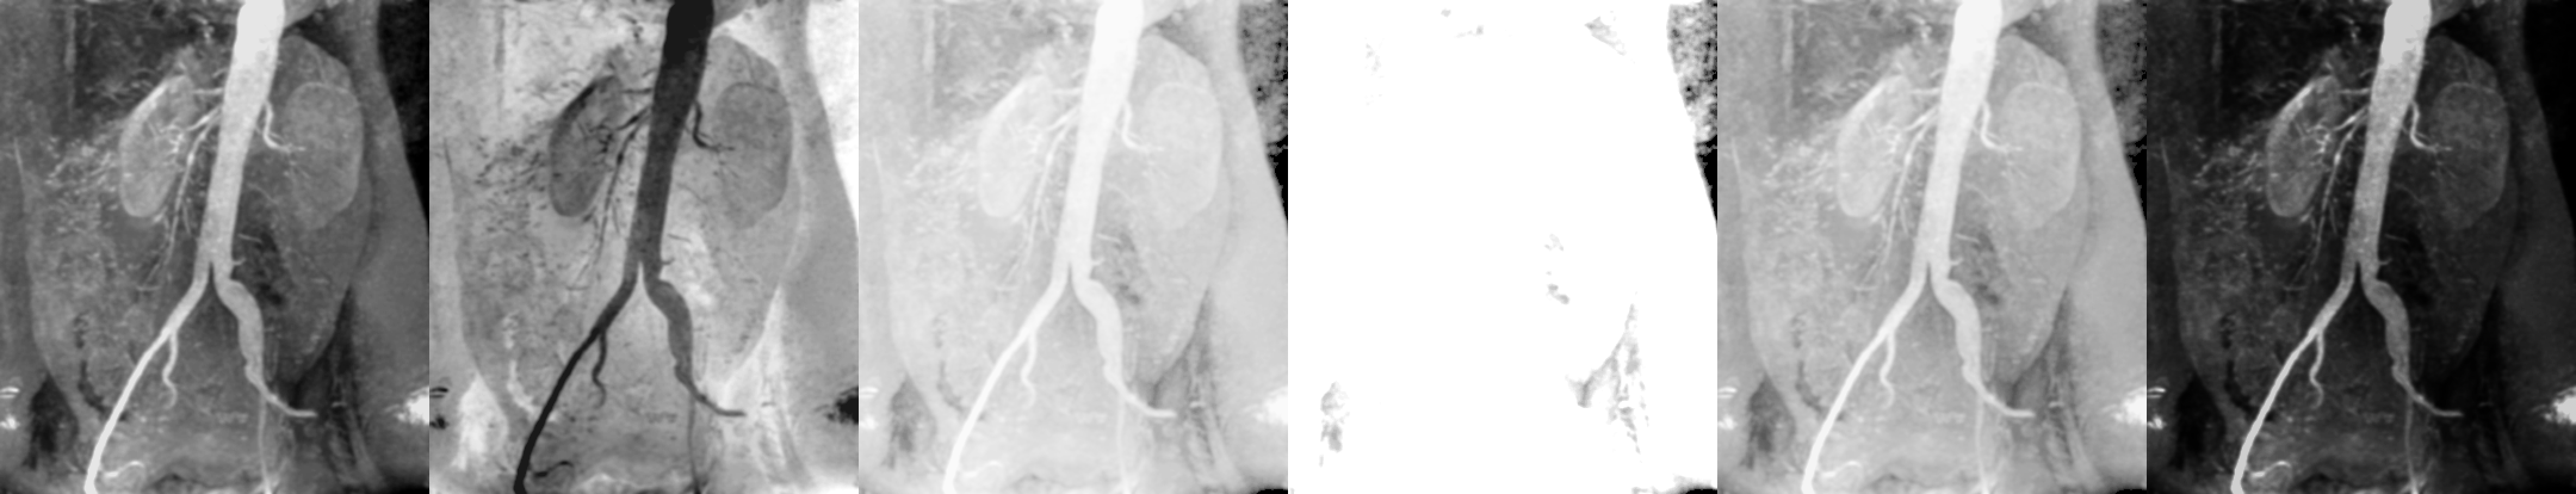

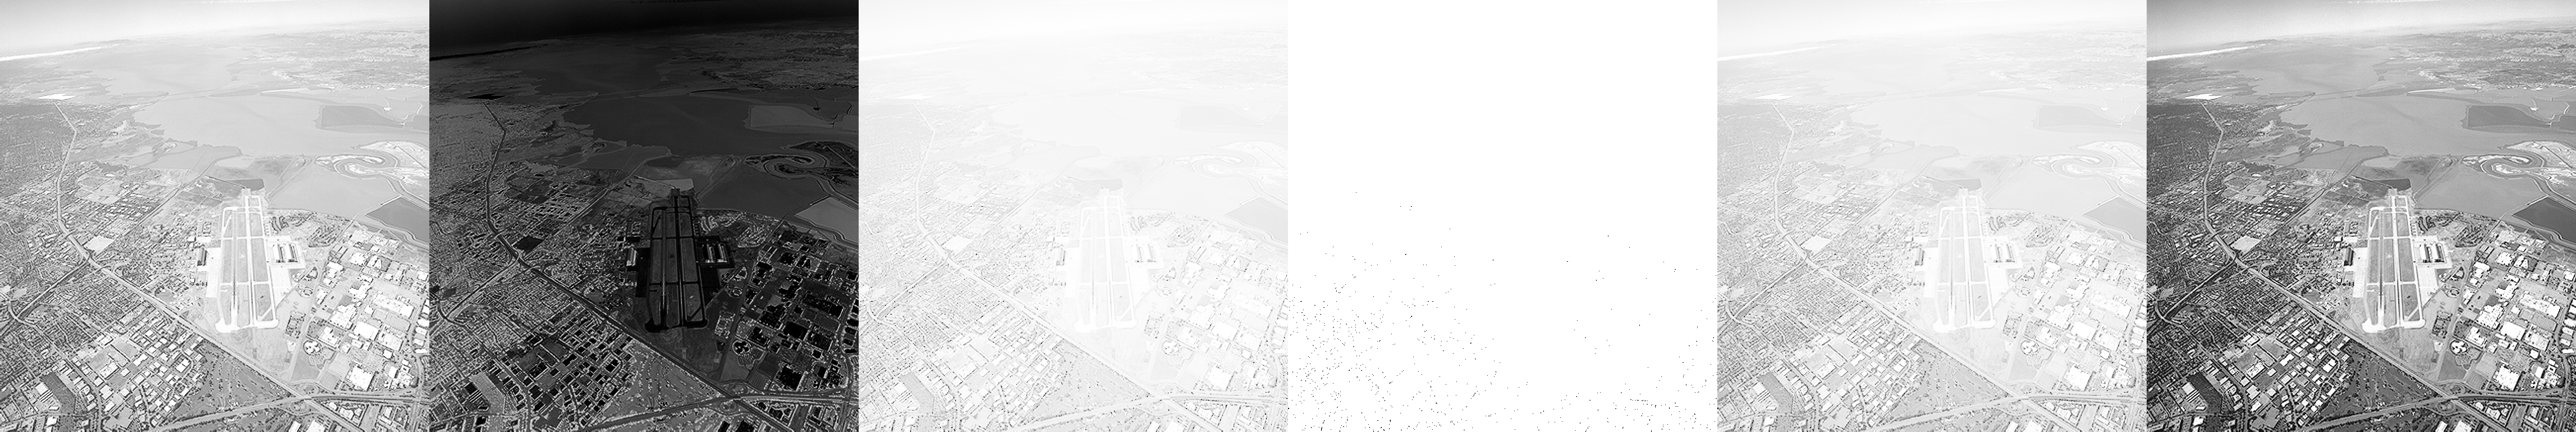

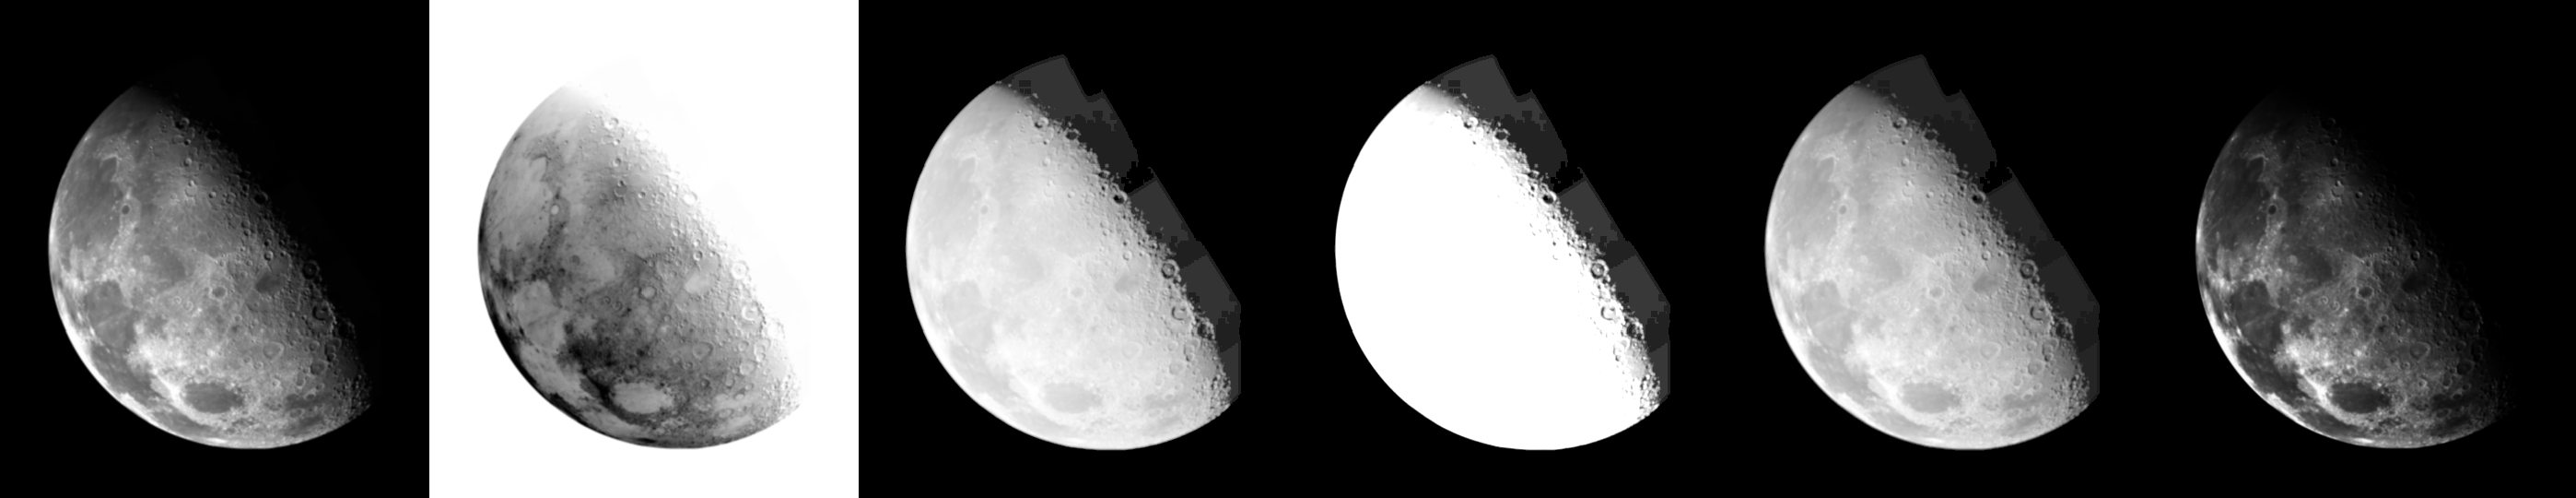

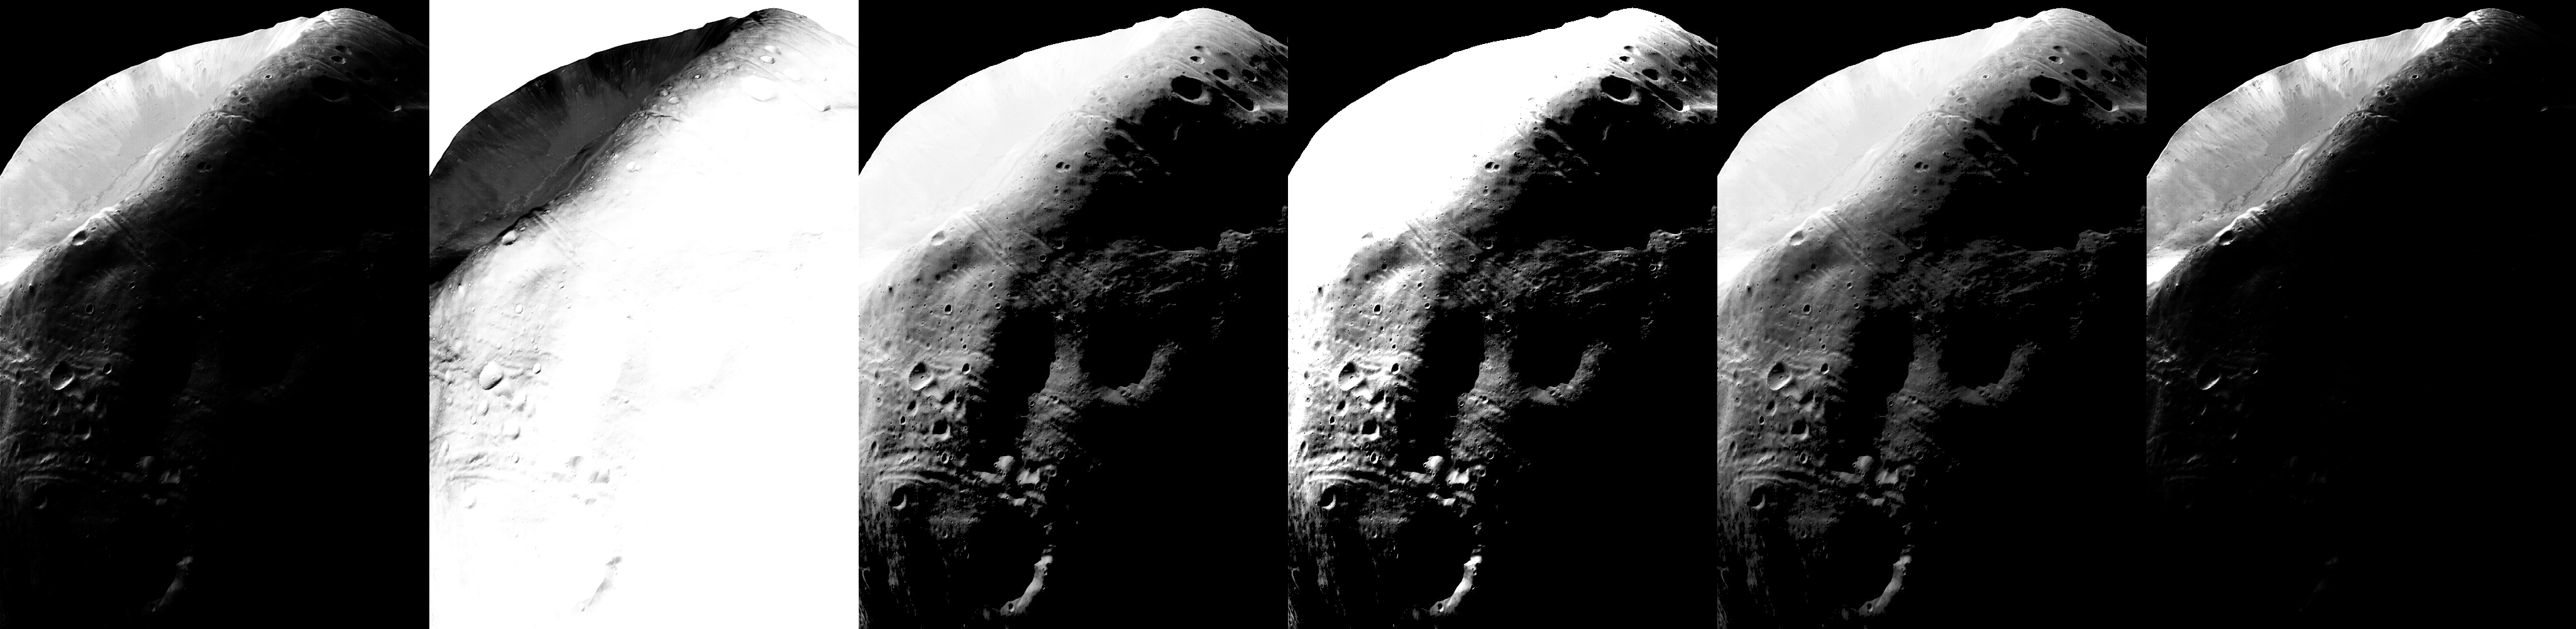

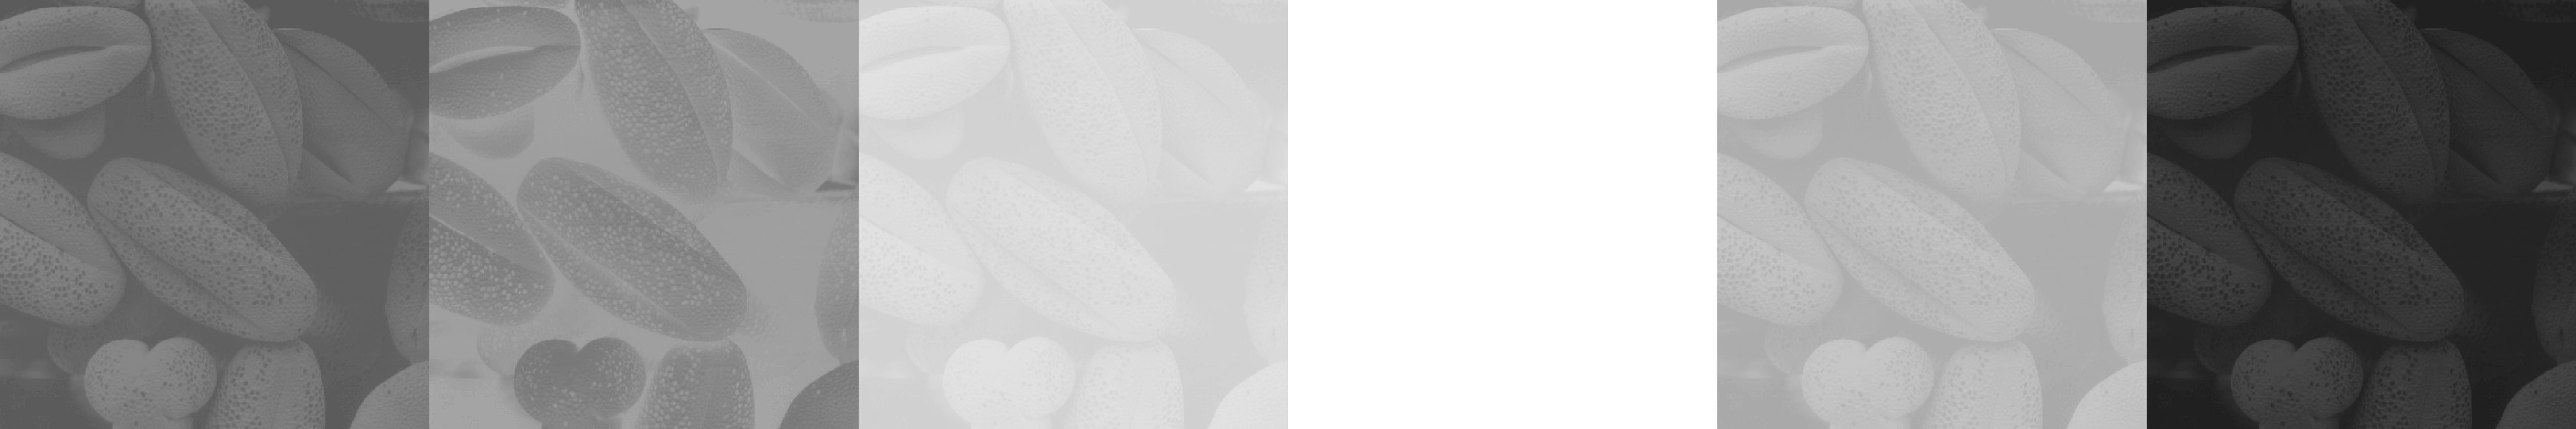

In [51]:
img_array = ["img1.tif","img2.tif","img3.tif","img4.tif","img5.tif","img6.tif"]


for each_img in img_array:

    ## Operation on each image
    original_image = Image.open(os.path.join(resource_path, each_img))
    img_neg = image_negative(original_image)
    img_log = log_transformation(original_image)
    img_inv_log = inverse_log_transformation(img_log)
    img_gamma_1 = gamma_correction(original_image, 2.5)
    img_gamma_2 = gamma_correction(original_image, 0.5)

    ## Stack the images horizontally
    stacked_image = np.concatenate((np.array(original_image), np.array(img_neg), np.array(img_log), np.array(img_inv_log), np.array(img_gamma_1), np.array(img_gamma_2)), axis=1)
    stacked_image = Image.fromarray(stacked_image)

    ## Save the images
    os.makedirs(os.path.join(resource_path, each_img.split(".")[0]+"_processed"), exist_ok=True)
    original_image.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed","original.png"))
    img_neg.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed", "negative.png"))
    img_log.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed", "log.png"))
    img_inv_log.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed", "inverse_log.png"))
    img_gamma_1.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed", "gamma_2.5.png"))
    img_gamma_2.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed", "gamma_0.5.png"))
    stacked_image.save(os.path.join(resource_path, each_img.split(".")[0]+"_processed", "stacked.png"))

    ## Display the Stacked Image
    display(stacked_image)


    
